In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from scipy.sparse import hstack

In [45]:
# Step 1: Load and preprocess the data
df = pd.read_csv('BABE_scraped.csv')
df['content'] = df['content'].str.lower()  # Convert text to lowercase

df.dropna(subset=['content'], inplace=True) # Drop rows with missing values in the 'content' column

In [46]:
df.head()

,Unnamed: 0,url,content,type_class
0,0,https://www.foxnews.com/entertainment/australi...,"""orange is the new black"" star yael stone is r...",2
1,1,https://www.alternet.org/2020/06/law-and-order...,mark twain's instruction to curious residents ...,0
2,2,https://www.nbcnews.com/news/latino/after-step...,it wasn't the content of white house adviser s...,0
3,3,https://www.alternet.org/2019/07/fox-news-has-...,donald trump thinks white nationalism is going...,0
4,4,https://www.alternet.org/2019/08/a-new-low-was...,"on saturday, august 3, el paso became the scen...",0


In [47]:
# Step 2: Feature extraction
print("Step 2: Feature Extraction...")
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_tfidf = vectorizer.fit_transform(df['content'])

# Calculate word count for each article
df['word_count'] = df['content'].apply(lambda x: len(x.split()))

# Combine TF-IDF vectors with word count
X_combined = hstack([X_tfidf, df['word_count'].values.reshape(-1, 1)])

y = df['type_class']

Step 2: Feature Extraction...


In [48]:
# Step 3: Split data into training, validation, and testing sets
print("Step 3: Splitting data into training, validation, and testing sets...")
X_train, X_temp, y_train, y_temp = train_test_split(X_combined, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

Step 3: Splitting data into training, validation, and testing sets...


In [49]:
# Step 4: Train the Naive Bayes classifier
print("Step 4: Training the Naive Bayes classifier...")
clf = MultinomialNB()
clf.fit(X_train, y_train)

Step 4: Training the Naive Bayes classifier...


MultinomialNB()

In [50]:
# Step 5: Evaluate the model on the validation set
print("Step 5: Evaluating the model on the validation set...")
y_val_pred = clf.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)

Step 5: Evaluating the model on the validation set...
Validation Accuracy: 0.654320987654321


In [51]:
# Step 6: Evaluate the model on the test set
print("Step 6: Evaluating the model on the test set...")
y_test_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

Step 6: Evaluating the model on the test set...
Test Accuracy: 0.7484662576687117


In [52]:
# Step 7: Print classification report for test set
print("\nClassification Report:")
print("Validation Accuracy:", val_accuracy)
print("Test Accuracy:", test_accuracy)
print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))
print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))


Classification Report:
Validation Accuracy: 0.654320987654321
Test Accuracy: 0.7484662576687117

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.86      0.72        74
           1       0.50      0.06      0.10        18
           2       0.72      0.59      0.65        70

    accuracy                           0.65       162
   macro avg       0.61      0.50      0.49       162
weighted avg       0.65      0.65      0.62       162


Test Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.90      0.81        90
           1       0.00      0.00      0.00        11
           2       0.79      0.66      0.72        62

    accuracy                           0.75       163
   macro avg       0.51      0.52      0.51       163
weighted avg       0.71      0.75      0.72       163



In [53]:
from scipy.sparse import hstack

# Add article length as a feature
df['article_length'] = df['content'].apply(len)

# Combine text features with custom features
X_custom = hstack([X_combined, df['article_length'].values.reshape(-1, 1)])

# Perform cross-validation
cv_scores = cross_val_score(clf, X_custom, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.69230769 0.69230769 0.62153846 0.69230769 0.68615385]
Mean CV Accuracy: 0.676923076923077


**Data Loading and Preprocessing**
- The dataset (BABE_scraped.csv) contains news articles where each article is labeled with a political bias class (0 for left, 1 for center, and 2 for right).
- Text preprocessing involves converting the text to lowercase and removing rows with missing content.

**Feature Extraction**
- Text data is transformed into numerical feature vectors using TF-IDF (Term Frequency-Inverse Document Frequency) representation. This process captures the importance of words in the documents relative to the entire corpus.
- Stop words are removed, and only the top 1000 most frequent words are considered.

**Data Splitting**
- The dataset is split into training, validation, and test sets with a ratio of 80:10:10 respectively. This ensures that the model is trained on a majority of the data while still having separate sets for validation and final evaluation.

**Model Training**
- The Multinomial Naive Bayes classifier is trained on the training data. Naive Bayes classifiers are commonly used for text classification tasks due to their simplicity and effectiveness with high-dimensional data like text.

**Model Evaluation on Validation Set**
- The trained model's performance is evaluated on the validation set. Accuracy, precision, recall, and F1-score are computed to assess how well the model classifies the political biases in the validation data.

**Model Evaluation on Test Set**
- The model's performance is further evaluated on the test set to ensure its generalization ability. Accuracy metrics are computed to determine how well the model performs on unseen data.

**Classification Report**
- The classification report provides detailed metrics for each political bias class (left, center, right) including precision, recall, and F1-score. This helps in understanding the model's performance for each class individually.

**Custom Feature Addition and Cross-Validation**
- The custom feature added to the model is the "article length." This feature represents the length (number of characters, words, or sentences) of each news article in the dataset. By incorporating this additional information into the feature matrix, the model can potentially capture patterns related to the length of articles and how it correlates with their political bias classification.
- In the context of this NLP project, adding the article length as a feature serves two primary purposes:
    - By including the article length as a feature, the model gains additional information beyond just the textual content of the articles. This can help the model better differentiate between articles of different lengths and potentially capture any correlations between article length and political bias.
    - Testing for Correlation between Length and Bias: The inclusion of article length as a feature allows the model to test whether there is a correlation between the length of news articles and their political bias classification. It enables the model to learn if certain political biases tend to manifest in longer or shorter articles, which could provide insights into how different biases are expressed in media content.
- Overall, by incorporating the article length as a custom feature, the model aims to capture any potential relationships between the length of news articles and their political bias classifications, thereby enhancing its ability to accurately classify articles based on their content and length.


**Performance Metrics Explanation:**

**Accuracy**

- represents the proportion of correctly classified instances (articles) out of the total instances in the dataset. It gives an overall measure of the model's correctness in predicting the political bias of news articles across all classes (left, center, right). A higher accuracy indicates better performance, but it may not be sufficient if the dataset is imbalanced.

**Precision:**

- measures the proportion of true positive predictions (correctly predicted instances) for a specific class (e.g., left, center, right) out of all instances predicted as that class. It indicates the model's ability to avoid false positives for a given class. Higher precision means fewer false positives.

**Recall (Sensitivity):**

- Recall measures the proportion of true positive predictions for a specific class out of all instances that actually belong to that class in the dataset. It indicates the model's ability to capture all instances of a particular class. Higher recall means fewer false negatives.

**F1-Score:**

- F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall, considering both false positives and false negatives. F1-score is particularly useful when classes are imbalanced, as it gives equal weight to precision and recall.

**Validation Set Performance:**

- The performance metrics computed on the validation set provide an estimate of how well the model generalizes to unseen data. It helps in tuning hyperparameters and assessing model performance during training.

**Test Set Performance:**

- The performance metrics computed on the test set indicate how well the model performs on completely unseen data. It provides a final evaluation of the model's ability to generalize to new instances.

In [54]:
fox_news = pd.read_csv('../top_publishers/fox_data.csv')
fox_news['text'] = fox_news['text'].str.lower()
print("FOX NEWS DATA:")
print(fox_news.head())

npr_news = pd.read_csv('../top_publishers/npr_data.csv')
npr_news['text'] = npr_news['text'].str.lower()
print("\nNPR NEWS DATA:")
print(npr_news.head())

nytimes_news = pd.read_csv('../top_publishers/nytimes_data.csv')
nytimes_news['text'] = nytimes_news['text'].str.lower()
print("\nNYTIMES NEWS DATA:")
print(nytimes_news.head())

washingtonpost_news = pd.read_csv('../top_publishers/washingtonpost_data.csv')
washingtonpost_news['text'] = washingtonpost_news['text'].str.lower()
print("\nWASHINGTON POST NEWS DATA:")
print(washingtonpost_news.head())

washingtontimes_news = pd.read_csv('../top_publishers/washingtontimes_data.csv')
washingtontimes_news['text'] = washingtontimes_news['text'].str.lower()
print("\nWASHINGTON TIMES DATA:")
print(washingtontimes_news.head())

FOX NEWS DATA:
   Unnamed: 0                                                url  label  \
0           0  https://www.foxnews.com/opinion/charlie-kirk-s...      2   
1           1  https://www.foxnews.com/politics/white-house-h...      2   
2           2  https://www.foxnews.com/us/why-those-ice-raids...      2   
3           3  https://www.foxnews.com/opinion/jim-hanson-rep...      2   
4           4  https://www.foxnews.com/health/trump-executive...      2   

                                                text  
0  on feb. 1, 1960, four black college students s...  
1  president trump on thursday hosted several hun...  
2  starting sunday, immigration and customs enfor...  
3  according to a report in the wall street journ...  
4  president donald trump signed an executive ord...  

NPR NEWS DATA:
   Unnamed: 0.1  Unnamed: 0  \
0            45          45   
1            71          71   
2            85          85   
3            88          88   
4            91          91   

 

In [34]:
print("Step 2: Feature Extraction...")
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_tfidf = vectorizer.fit_transform(fox_news['text'])

# Calculate word count for each article
fox_news['word_count'] = fox_news['text'].apply(lambda x: len(x.split()))

# Combine TF-IDF vectors with word count
X_combined = hstack([X_tfidf, fox_news['word_count'].values.reshape(-1, 1)])

# Predict labels using the trained Naive Bayes classifier
y_pred = clf.predict(X_combined)

Step 2: Feature Extraction...


In [36]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

def predict_labels(df, clf, vectorizer):
    # Preprocess text data
    df['text'] = df['text'].str.lower()

    # Feature extraction
    X_tfidf = vectorizer.transform(df['text'])

    # Calculate word count for each article
    df['word_count'] = df['text'].apply(lambda x: len(x.split()))

    # Combine TF-IDF vectors with word count
    X_combined = hstack([X_tfidf, df['word_count'].values.reshape(-1, 1)])

    # Predict labels using the trained Naive Bayes classifier
    y_pred = clf.predict(X_combined)
    
    return y_pred

# Load your trained Naive Bayes classifier (clf) and TF-IDF vectorizer (vectorizer) here

# Now let's run the function for each DataFrame
dataframes = {
    'Fox News': fox_news,
    'NPR News': npr_news,
    'NY Times': nytimes_news,
    'Washington Post': washingtonpost_news,
    'Washington Times': washingtontimes_news
}

predicted_labels = {}
for source, df in dataframes.items():
    predicted_labels[source] = predict_labels(df, clf, vectorizer)


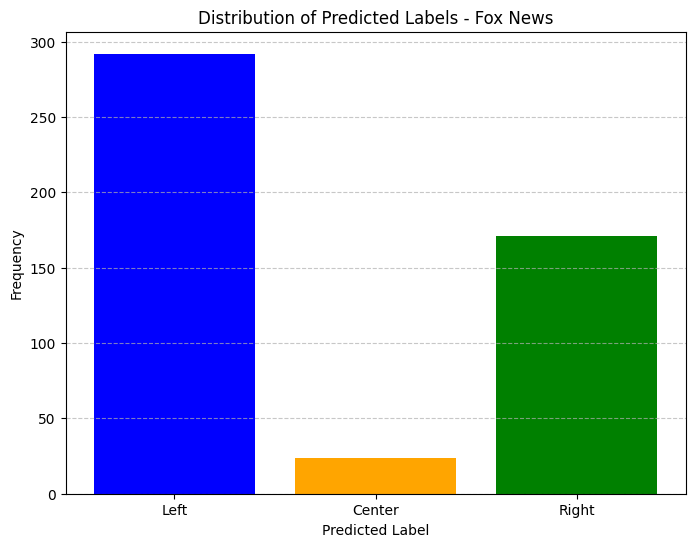

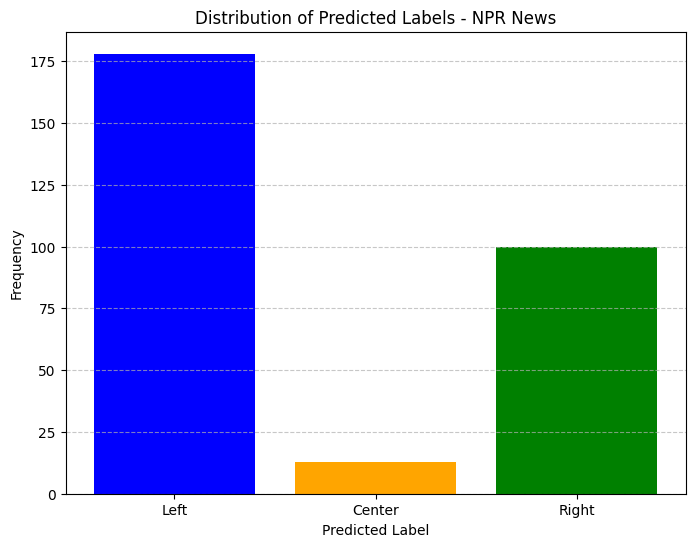

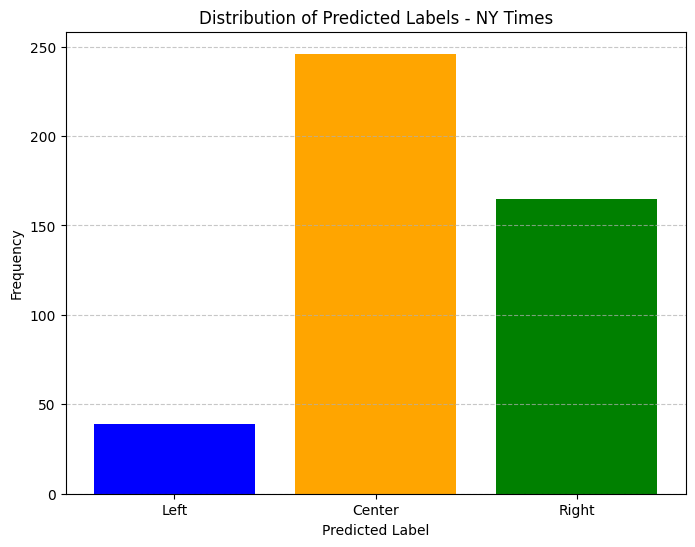

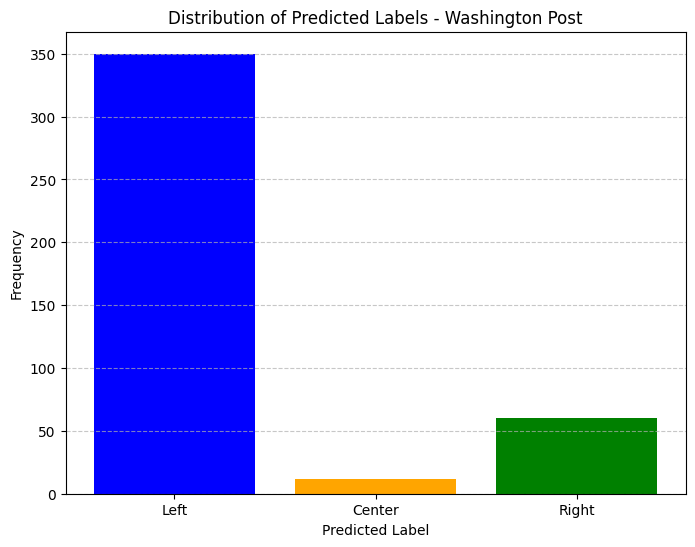

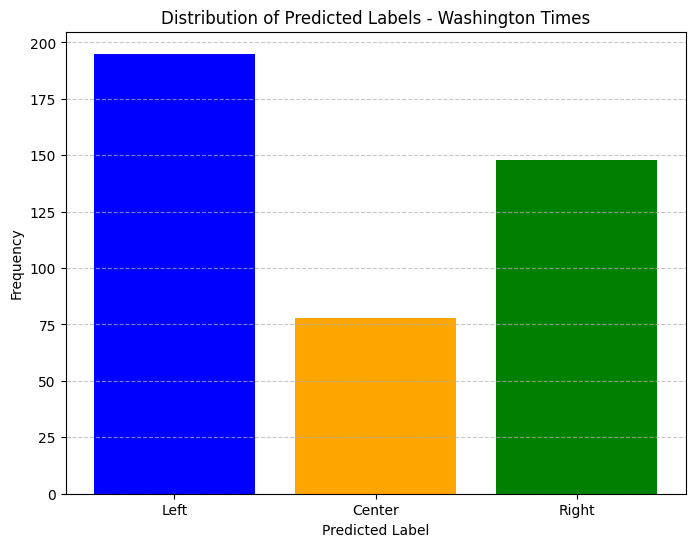

In [41]:
def convert_to_str_labels(predicted_labels):
    return int_to_str_labels(predicted_labels)


# Convert integer labels to string labels for each news source
str_labels_predicted = {source: convert_to_str_labels(labels) for source, labels in predicted_labels.items()}

import matplotlib.pyplot as plt

# Define a function to plot the distribution of predicted labels
def plot_label_distribution(str_labels_array, title):
    # Sort labels based on their position (Left, Center, Right)
    labels = ['Left', 'Center', 'Right']
    counts = [np.sum(str_labels_array == label) for label in labels]
    
    # Plot the distribution
    plt.figure(figsize=(8, 6))
    plt.bar(labels, counts, color=['blue', 'orange', 'green'])
    plt.xlabel('Predicted Label')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    
for source, str_labels in str_labels_predicted.items():
    plot_label_distribution(str_labels, f'Distribution of Predicted Labels - {source}')